<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/In_class9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

# 0.) Import and Clean Data

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df=pd.read_csv("/content/gdrive/MyDrive/Country-data.csv")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.shape

(167, 10)

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [36]:
# Histogram to check the nature of data 

<ipython-input-9-bbb97e436835>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


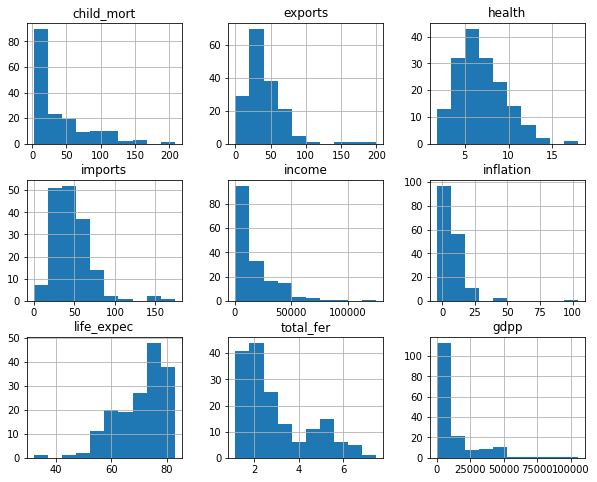

In [9]:
fig, ax = plt.subplots()
df.hist(ax=ax)
fig.set_size_inches(10, 8)

In [10]:
# From the historgram, we observe that the some of the features like GDPP, Income, Child_mort 
# has the values left skewed. While others seem to be normally distributed. 

In [37]:
# Correlation Matrix to check the data 

<AxesSubplot:>

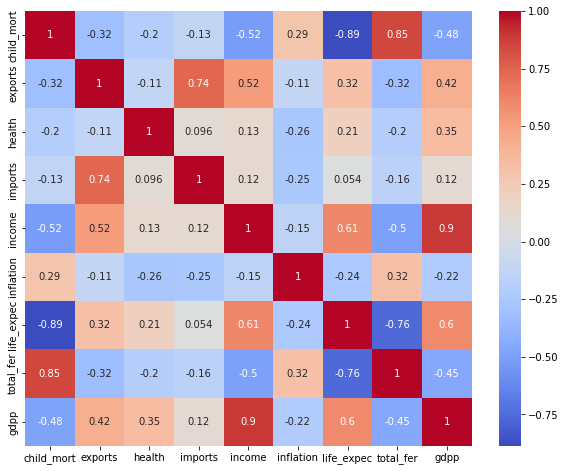

In [11]:
plt.figure(figsize=(10, 8))
# compute the correlation matrix
corr = df.corr()

# plot the correlation matrix using seaborn heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

Based on the correlation matrix, we see that income and gdpp are highly correlated. Also, Income is correlated with life expectancy. Interestingly Child Mortality is negatively correlated with income. Exports and Imports are quite correlated which means exporters need to import their raw materials to produce and export the items. 
```



In [38]:
# Scaling the data to fit with the model 

In [12]:
cols_to_scale = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                 'life_expec', 'total_fer', 'gdpp']

scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df[cols_to_scale])
df_norm= pd.DataFrame(normalized_df, columns=cols_to_scale)
df_norm['country'] = df['country']
print(df_norm.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp              country  
0   0.736593  0.003073          Afghanistan  
1   0.078864  0.036833              Albania  
2   0.274448  0.040365              Algeria  
3   0.790221  0.031488               Angola  
4   0.154574  0.114242  Antigua and Barbuda  


# 1.) Fit a kmeans model with any number of Clusters

In [13]:
cols_to_cluster = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 
                   'total_fer', 'gdpp']
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_norm[cols_to_cluster])
print(kmeans.labels_)

[0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 0 1 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

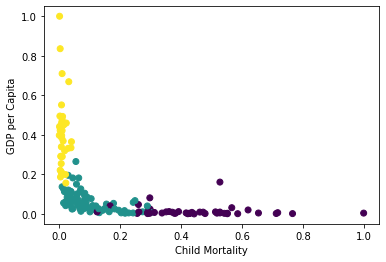

In [14]:
# Add the cluster labels to the DataFrame
df_norm['cluster'] = kmeans.labels_

# Create a scatter plot of the two selected features, colored by cluster
plt.scatter(df_norm['child_mort'], df_norm['gdpp'], c=df_norm['cluster'])
plt.xlabel('Child Mortality')
plt.ylabel('GDP per Capita')
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means

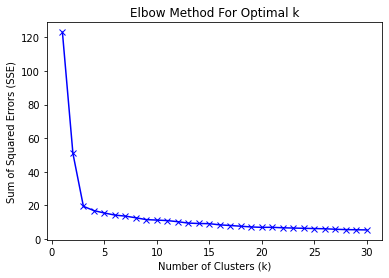

In [15]:
k_values = range(1, 31)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=30, max_iter=300, random_state=42)
    kmeans.fit(df_norm.drop(['country'], axis=1))
    sse.append(kmeans.inertia_)

# Create a line plot of the SSE values for each k
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit the model accordingly

Based on the elbow plot, there seems to be a significant decrease in SSE as the number of clusters increases from 2 to 3, and then the decrease in SSE appears to become less significant. Thus, it seems reasonable to choose 3 clusters for this dataset.

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=30, random_state=42)
kmeans.fit(df_norm.drop('country', axis=1))

KMeans(n_clusters=3, n_init=30, random_state=42)

# 5.) Create a list of countries that are in each cluster. Write anything interesting you see.

In [17]:
# Create a dictionary to store the countries in each cluster
cluster_dict = {}
for i, label in enumerate(kmeans.labels_):
    if label not in cluster_dict:
        cluster_dict[label] = []
    cluster_dict[label].append(df.index[i])
    
# Print the countries in each cluster
for label, countries in cluster_dict.items():
    print(f"Cluster {label}: {countries}")

Cluster 2: [0, 3, 17, 25, 26, 28, 31, 32, 36, 37, 38, 40, 49, 50, 55, 56, 59, 63, 64, 66, 72, 80, 81, 84, 87, 88, 93, 94, 97, 99, 106, 108, 112, 113, 116, 126, 129, 132, 136, 142, 147, 149, 150, 155, 165, 166]
Cluster 1: [1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 24, 27, 30, 33, 34, 35, 39, 41, 45, 46, 47, 48, 51, 52, 57, 61, 62, 65, 67, 69, 70, 71, 76, 78, 79, 83, 85, 86, 89, 90, 92, 95, 96, 100, 101, 102, 103, 104, 105, 107, 109, 115, 117, 118, 119, 120, 121, 124, 125, 127, 128, 130, 131, 137, 140, 141, 143, 146, 148, 151, 152, 153, 154, 156, 160, 161, 162, 163, 164]
Cluster 0: [7, 8, 15, 23, 29, 42, 43, 44, 53, 54, 58, 60, 68, 73, 74, 75, 77, 82, 91, 98, 110, 111, 114, 122, 123, 133, 134, 135, 138, 139, 144, 145, 157, 158, 159]


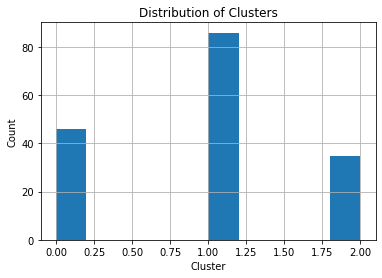

In [18]:
df_norm['cluster'].hist()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()

Based on the list of countries in each cluster, we can see that Cluster 2 has the smallest number of countries compared to the other clusters. This could indicate that the countries in this cluster share more similarities than the other clusters. Cluster 1 has the largest number of countries, which could indicate that there is a wider range of economic and social factors among the countries in this cluster. Cluster 0 falls in between the other two clusters in terms of the number of countries it contains.

Clustering algorithm has grouped countries based on their similarities across several different economic and social indicators. Further analysis could be done to investigate the specific factors that contributed to the grouping of countries in each cluster.

#6.) Create a table of descriptive statistics. Rows: The cluster number. Columns : be all the features. Values be the mean of the centroid. Use the non scaled X values for better interpretation.

In [19]:
# Select the columns to cluster on
cols_to_cluster = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Initialize the KMeans object with any number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the KMeans model to the selected columns
kmeans.fit(df[cols_to_cluster])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [39]:
# Unscaled Data 

In [25]:
# Select the relevant features
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
            'total_fer', 'gdpp']

# Extract the values of the selected features for each country
X = df[features].values

# Assign each country to a cluster
cluster_labels = kmeans.predict(X)

# Create a DataFrame of the non-scaled X values and cluster labels
df_clustered = pd.DataFrame(X, columns=features)
df_clustered['Cluster'] = cluster_labels

# Group by cluster and calculate the mean of each feature
df_descriptive1 = df_clustered.groupby('Cluster').mean()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [21]:
df_descriptive

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
1,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000


# 7.) Wrote a visualization about the descriptive statistics

In [33]:
# Unscaled Data 

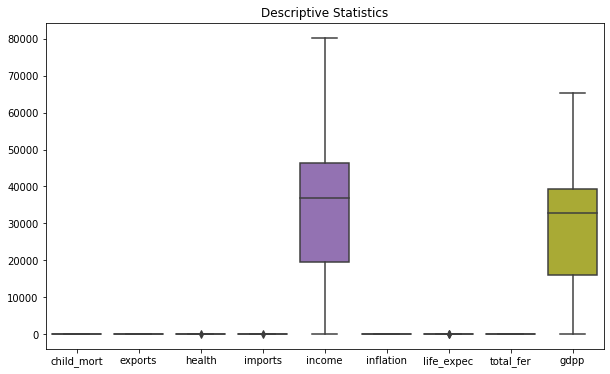

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_descriptive1.describe(), ax=ax)
ax.set_title("Descriptive Statistics")
plt.show()